<a href="https://www.kaggle.com/code/gabrielluizone/heuristic-search?scriptVersionId=152767250" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## $\mathbb{Faculdade\textbf{ }de\textbf{ }Tecnologia\textbf{ }da\textbf{ }Baixada \textbf{ }Santista}$
#### **Busca Heurística**
- Inteligência Computacional `Ciência de Dados`

In [132]:
import time
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

#### Definição do Valor Herístico e seu Cálculo
> **Manhattan Distance**: Por que escolhemos ela? Vamos usar como exemplo uma analogia entre a diferença entre essas duas distâncias, vamos imaginar uma a rota de GPS para dois veículos, uma para um carro e outra para um helicóptero. A Distância Euclidiana seria o segmento de uma reta na qual indicaria uma possível rota de helicóptero (na qual não haveria preocupação com as ruas já que é um veículo aéreo, e geometricamente seria a hipotenusa de um triângulo) e a Distância Manhattan seria um segmento de retas na vertical quanto na horizontal semelhante a uma rota de carro (já que esse obedece o sentido das ruas, e devido à esse comportamento essa medida de distância é também conhecida como City Block, e  geometricamente seriam a soma dos catetos).

Fonte: [MineracaoDeDados](https://mineracaodedados.wordpress.com/tag/distancia-manhattan/#:~:text=J%C3%A1%20a%20Dist%C3%A2ncia%20Manhattan%20tem,y1%20%E2%80%93%20y2%7C.)

#### $\text{Euclidean Distance: } \sqrt{{(x_1 - x_2)^2 + (y_1 - y_2)^2}}$\
#### $\text{Manhattan Distance: } |x_1 - x_2| + |y_1 - y_2|$

In [133]:
def h(p1, p2):
    #return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 )**(1/2) # Euclides
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1]) # Manhattan 

### Função paara Visualização Real
- Atualização do Gráfico
---

In [134]:
####### A Estrela ###############################################################
# Plot para a Visualização Formatada do Gráfico em Tempo Real :D
def visualize(labirinto, caminho, inicio, fim, aberto, fechado, g_score, f_score, hr, end):
    plt.figure(figsize=(10, 10))
    plt.imshow(labirinto, cmap='gray', interpolation='nearest')
    if hr:
        for node in aberto:
            plt.text(node[1], node[0], str(g_score[node]) + '/ ' + str(f_score[node] - g_score[node]), color='r', fontsize=10)
    plt.plot([x[1] for x in caminho], [x[0] for x in caminho], color='#5f7fc7', linewidth=5)
    if not end:
        plt.plot([x[1] for x in aberto], [x[0] for x in aberto], 'o', color='#5268f7', markersize=8)
        plt.plot([x[1] for x in fechado], [x[0] for x in fechado], 'o', color='w', markersize=7, alpha=.2)
        plt.scatter(inicio[1], inicio[0], color='#f75252', label='Começo', s=80, marker='s')
        plt.scatter(fim[1], fim[0], color='#52f789', label='Chegada', s=80, marker='s')
    plt.grid(False)
    plt.title('Busca A* (Heurística) em Labirinto')
    plt.show()

####### Gulosa ###############################################################
# Plot para a Visualização Formatada do Gráfico em Tempo Real :D
def visualizeg(labirinto, caminho, inicio, fim, aberto, fechado, f_score, hr, end):
    plt.figure(figsize=(10, 10))
    plt.imshow(labirinto, cmap='gray', interpolation='nearest')
    if hr:
        for node in aberto:
            plt.text(node[1], node[0], str(f_score[node]), color='r', fontsize=8)
    plt.plot([x[1] for x in caminho], [x[0] for x in caminho], color='#e89d64', linewidth=5)
    if not end:
        plt.plot([x[1] for x in aberto], [x[0] for x in aberto], 'o', color='#5268f7', markersize=10)
        plt.plot([x[1] for x in fechado], [x[0] for x in fechado], 'o', color='w', markersize=7, alpha=.2)
        plt.scatter(inicio[1], inicio[0], color='#f75252', label='Começo', s=80, marker='s')
        plt.scatter(fim[1], fim[0], color='#52f789', label='Chegada', s=80, marker='s')
    plt.grid(False)
    plt.title('Busca Gulosa (Heurística) em Labirinto')
    plt.show()

#### **Como o Algoritmo A* Funciona?**

1. **Variáveis**: Começando com as listas de nós abertos e fechados. A lista aberta contém os nós que ainda precisam ser explorados, enquanto a lista fechada contém os nós que já foram explorados

2. **Loop**: Enquanto houver nós na lista aberta, o algoritmo seleciona o nó com o menor valor de `f_score` (que é a soma do custo acumulado `g_score` e a heurística `h`) e o move para a lista fechada

3. **Condicionais**: Em seguida, o algoritmo verifica todos os vizinhos do nó atual. Se o vizinho é uma parede ou já foi visto, ele é ignorado. Caso contrário, o algoritmo atualiza o `g_score` e o `f_score` do vizinho e o adiciona à lista aberta

4. **Finalização**: Este processo continua até que o nó objetivo entre na lista fechada (ele achou um bom caminho) ou até que a lista aberta esteja vazia, o que significa que não tem como chegar lá

In [146]:
def greedy_search(labirinto, inicio, fim, it=1, hr=False):
    # Lista de movimentos possíveis (cima, baixo, direita, esquerda)
    vizinhos = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    
    # Conjuntos de nós explorados e o que ainda falta explorar
    fechado = []
    aberto = [inicio]
    
    # Dicionário para rastrear o caminho
    veio_de = {}
    
    # Dicionário para armazenar os valores da função heurística
    f_score = {inicio: h(inicio, fim)}
    
    # Loop principal da Busca Gulosa
    while aberto:
        # Escolhe o nó com menor heurística
        atual = min(aberto, key=lambda x: f_score[x])

        # Verifica se alcançou o destino
        if atual == fim:
            caminho = []
            while atual in veio_de:
                caminho.append(atual)
                atual = veio_de[atual]
            caminho.append(inicio)
            caminho.reverse()
            
            # Visualiza o labirinto com o caminho encontrado 
            visualizeg(labirinto, caminho, inicio, fim, aberto, fechado, f_score, hr, end=True)
            return caminho

        # Move o nó atual de aberto para fechado
        aberto.remove(atual)
        fechado.append(atual)

        # Explora os vizinhos do nó atual
        for i, j in vizinhos:
            vizinho = atual[0] + i, atual[1] + j
            
            # Verifica se o vizinho está dentro dos limites do labirinto
            if 0 <= vizinho[0] < labirinto.shape[0]:
                if 0 <= vizinho[1] < labirinto.shape[1]:
                    # Verifica se o vizinho é um caminho livre (não é uma parede)
                    if labirinto[vizinho[0]][vizinho[1]] == 1:
                        continue
                else: continue
            else: continue

            # Verifica se o vizinho já foi explorado
            if vizinho in fechado: continue

            # Atualiza as informações sobre o vizinho
            veio_de[vizinho] = atual
            f_score[vizinho] = h(vizinho, fim)
            
            # Adiciona o vizinho à lista de nós a explorar
            if vizinho not in aberto and vizinho not in fechado:
                aberto.append(vizinho)

        # Visualiza o labirinto durante a execução do algoritmo (opcional)
        if len(aberto) % it == 0:  # Visualiza a cada 20 iterações
            visualizeg(labirinto, [], inicio, fim, aberto, fechado, f_score, hr, end=False)
            clear_output(wait=True)  # Limpa a saída do Jupyter Notebook

    return False

In [142]:
def a_star(labirinto, inicio, fim, it=1, hr=False):
    # Lista de movimentos possíveis (cima, baixo, direita, esquerda)
    vizinhos = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    
    # Conjuntos de nós explorados e o que ainda falta explorar
    fechado = set()  # Usamos um conjunto para operações mais rápidas de adicionar e verificar
    aberto = [inicio]
    
    # Dicionário para rastrear o caminho
    veio_de = {}
    
    # Dicionários para armazenar os custos acumulados e heurísticas
    g_score = {inicio: 0}
    f_score = {inicio: h(inicio, fim)}  # Aqui calculamos a Heurística

    # Loop principal do algoritmo A*
    while aberto:
        # Escolhe o nó com menor f_score
        atual = min(aberto, key=lambda x: f_score.get(x, np.inf))

        # Verifica se alcançou o destino
        if atual == fim:
            caminho = []
            while atual in veio_de:
                caminho.append(atual)
                atual = veio_de[atual]
            caminho.append(inicio)
            caminho.reverse()
            
            # Visualiza o labirinto com o caminho encontrado
            visualize(labirinto, caminho, inicio, fim, aberto, list(fechado), g_score, f_score, hr, end=True)
            return caminho

        # Move o nó atual de aberto para fechado
        aberto.remove(atual)
        fechado.add(atual)  # Usamos add() para adicionar ao conjunto

        # Explora os vizinhos do nó atual
        for i, j in vizinhos:
            vizinho = atual[0] + i, atual[1] + j
            tentativa_g_score = g_score[atual] + 1

            # Verifica se o vizinho está dentro dos limites do labirinto
            if 0 <= vizinho[0] < labirinto.shape[0]:
                if 0 <= vizinho[1] < labirinto.shape[1]: 
                    # Verifica se o vizinho é um caminho livre (não é uma parede)
                    if labirinto[vizinho[0]][vizinho[1]] == 1:
                        continue
                else: continue
            else: continue

            # Verifica se o vizinho já foi explorado e se o novo caminho é melhor
            if vizinho in fechado and tentativa_g_score >= g_score.get(vizinho, 0): continue

            # Atualiza as informações sobre o vizinho
            if tentativa_g_score < g_score.get(vizinho, 0) or vizinho not in aberto:
                veio_de[vizinho] = atual
                g_score[vizinho] = tentativa_g_score
                f_score[vizinho] = tentativa_g_score + h(vizinho, fim)
                
                # Adiciona o vizinho à lista de nós a explorar
                if vizinho not in aberto:
                    aberto.append(vizinho)

        # Visualiza o labirinto durante a execução do algoritmo
        if len(aberto) % it == 0:  # Visualiza a cada 20 iterações
            visualize(labirinto, [], inicio, fim, aberto, list(fechado), g_score, f_score, hr, end=False)
            clear_output(wait=True)  # Limpa a saída do Jupyter Notebook

    return False

---
### Criação do Labirinto

In [137]:
# Dimensão do Labirinto
d = 100, 200

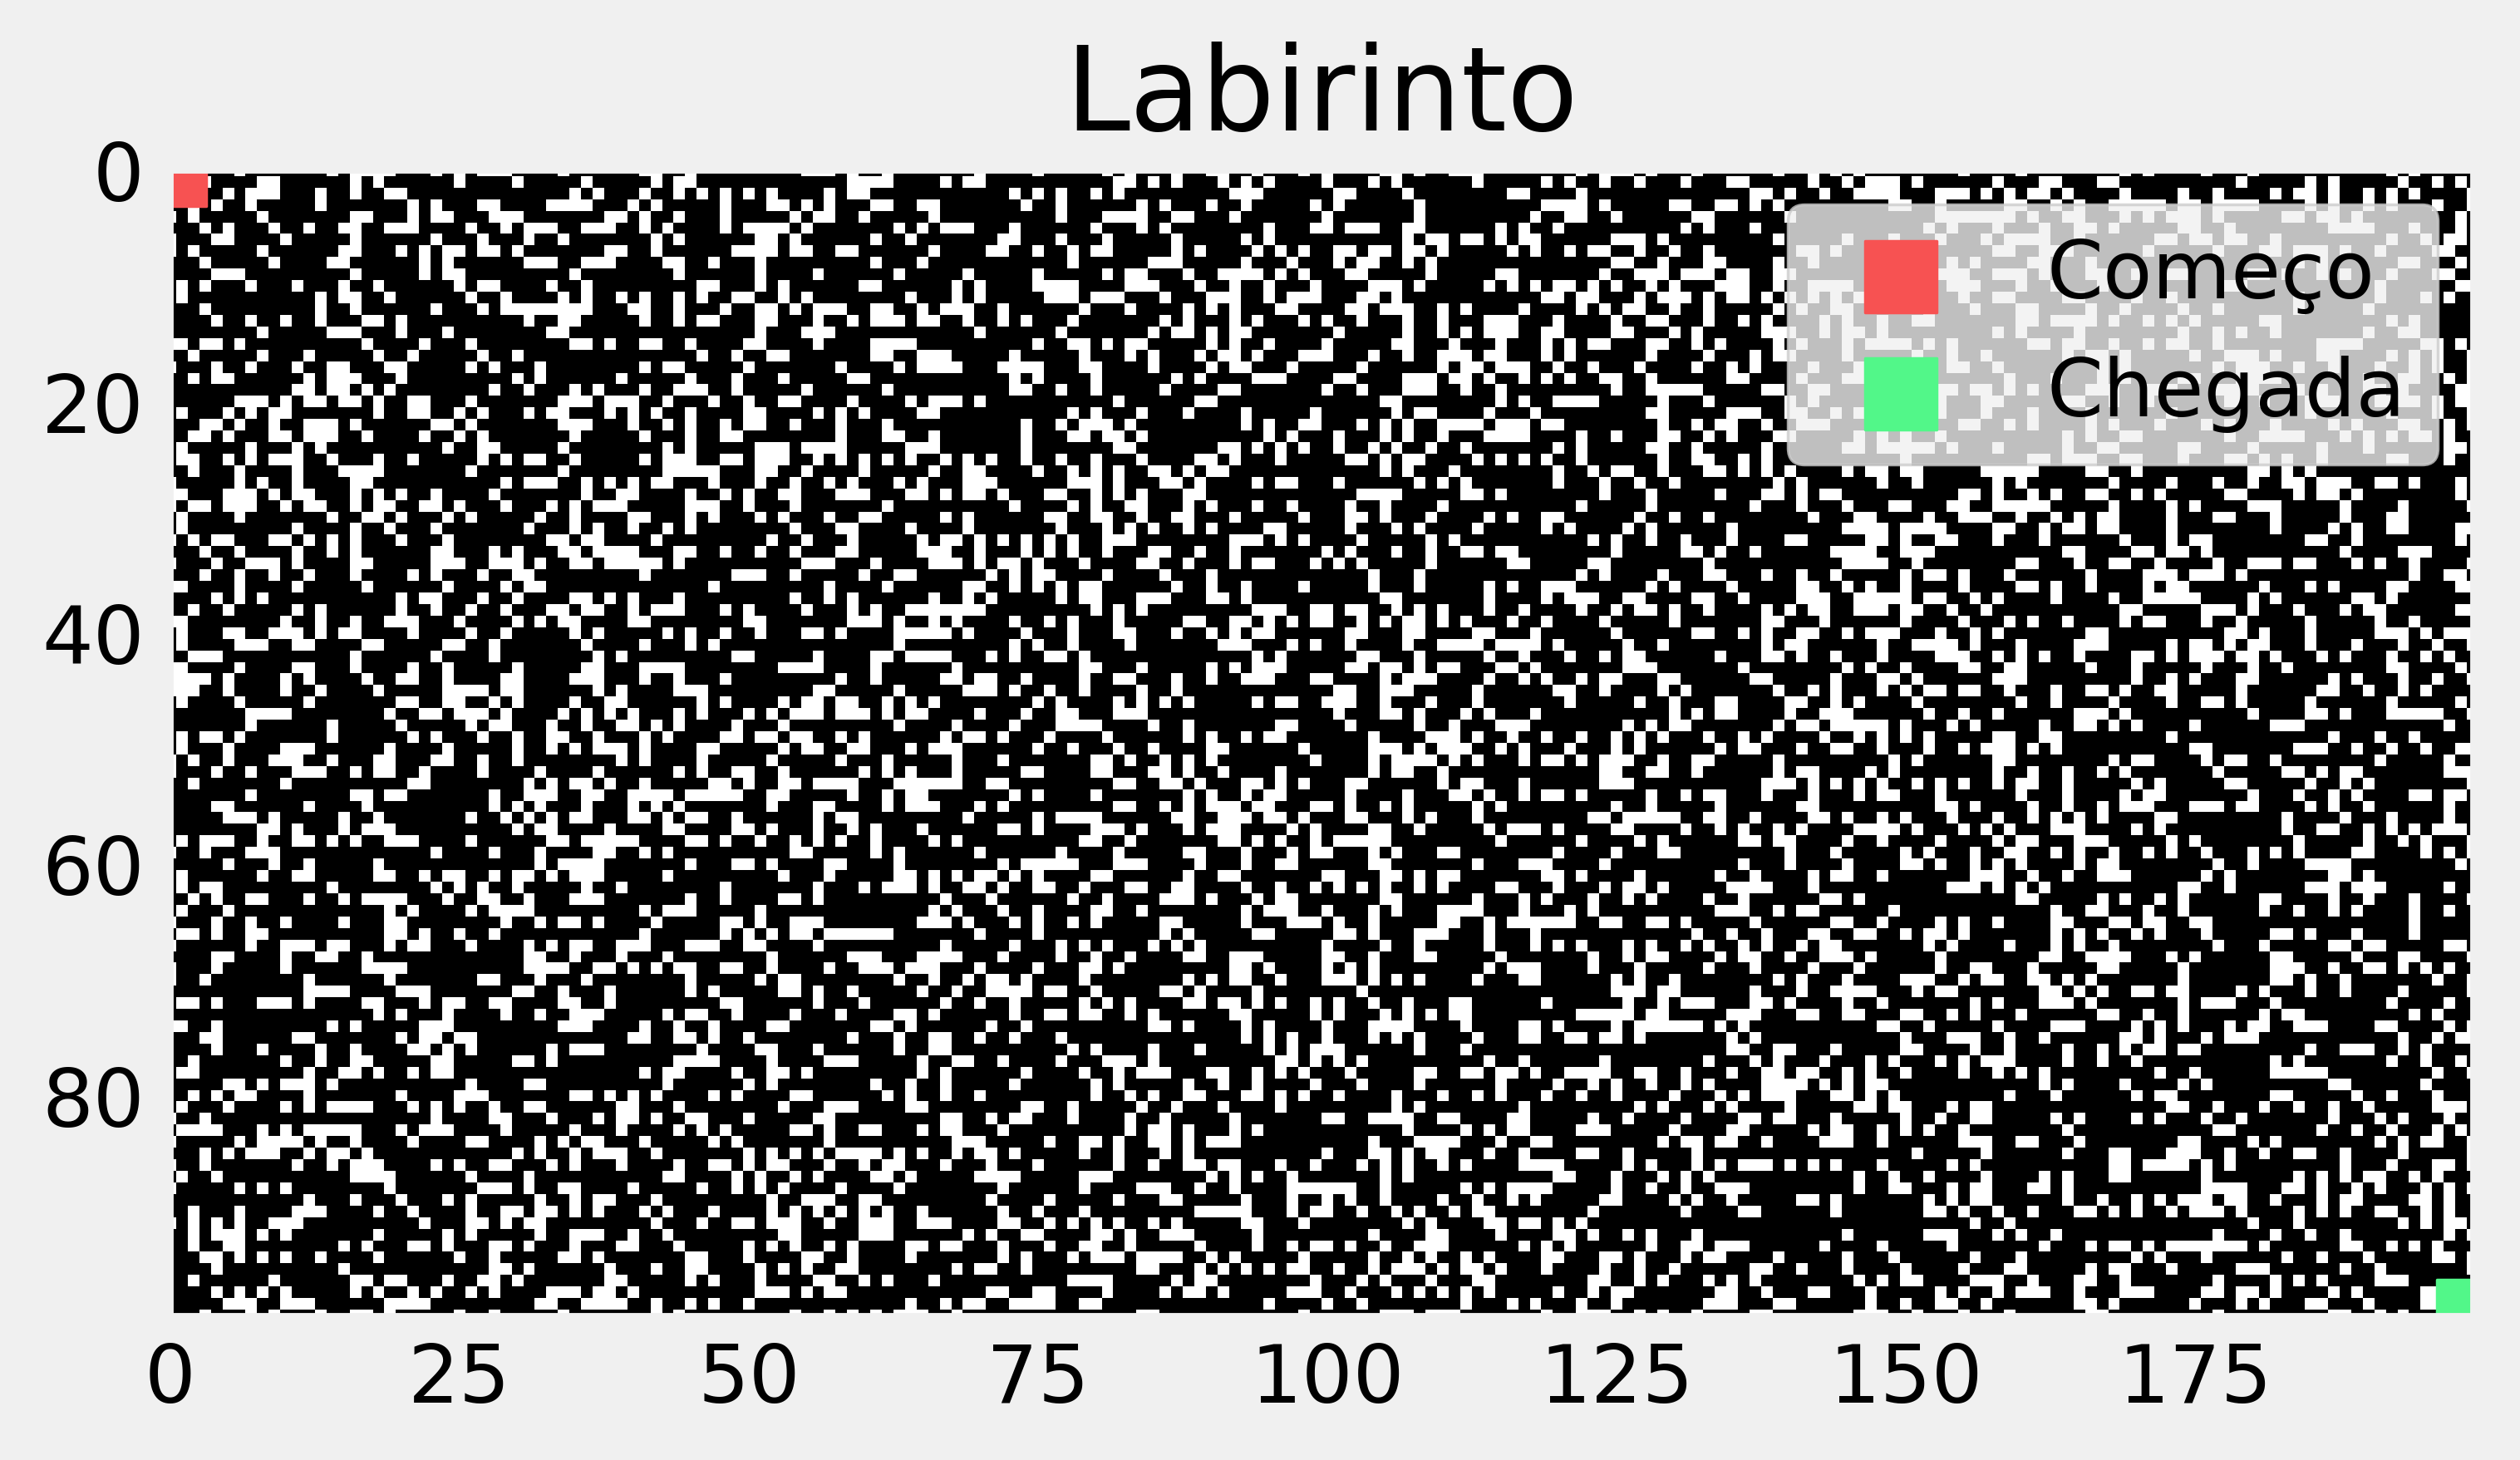

In [167]:
# Criação do labirinto & Definição do ponto de início (A) e fim (B)
labirinto = np.random.choice([0, 1], size=(d[0], d[1]), p=[.7, .3])

# Remover barreiras no inicio e fim
labirinto[ d[0]-1 ][ d[1]-1 ] = 0
labirinto[ d[0]-1 ][ d[1]-2 ] = 0
labirinto[ d[0]-2 ][ d[1]-1 ] = 0

labirinto[0][0] = 0
labirinto[0][1] = 0
labirinto[1][0] = 0

inicio = (0, 0)
fim = (d[0]-1, d[1]-1)

plt.figure(dpi=500)
plt.imshow(labirinto, cmap='gray', interpolation='nearest')
plt.scatter(inicio[1], inicio[0], color='#f75252', label='Começo', s=150, marker='s')
plt.scatter(fim[1], fim[0], color='#52f789', label='Chegada', s=150, marker='s')
plt.title('Labirinto'), plt.grid(False), plt.legend(), plt.show();

### Busca Gulosa (Greedy Search)
> **Objetivo:** Escolher em cada iteração, o caminho menos custoso até o objetivo

A Busca Gulosa expande o nó que parece estar mais próximo do objetivo, sem levar em consideração o custo do caminho percorrido até aquele nó. Ela usa uma função heurística $f(n) = h(n)$ para estimar o custo do caminho. Isso pode levar a soluções não ótimas, pois a busca gulosa pode se comprometer com um caminho que parece promissor, mas acaba sendo mais caro.

- **Problema:** Podemos ir a um beco sem saida. Se não detectamos repetições, ficaremos em Loop

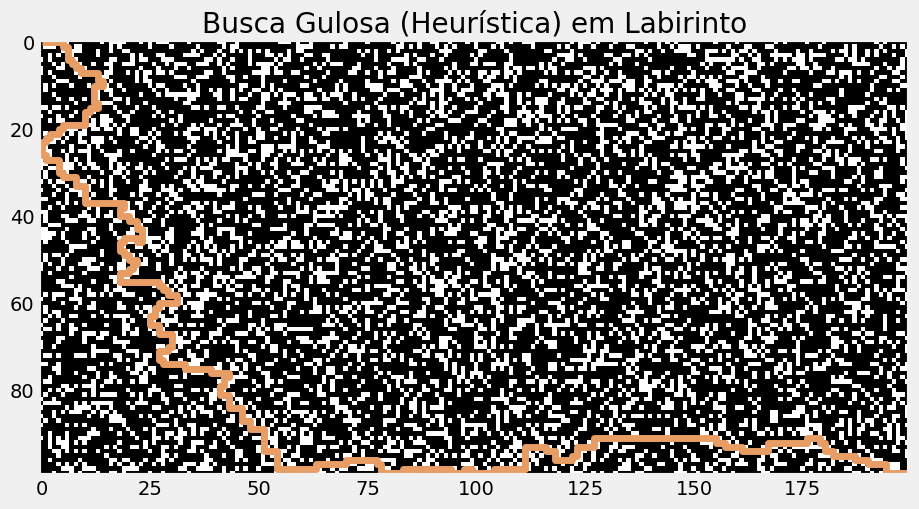

In [168]:
caminho = greedy_search(labirinto, inicio, fim, it=20, hr=False)

### Busca A* (Busca A Estrela)
> **Objetivo:** Encontrar o caminho mais curto e menos custoso em um labirinto

O Algoritmo A*, leva em consideração tanto o custo do caminho já percorrido $(g(n))$ quanto a estimativa do custo restante até o objetivo $(h(n))$. Ele usa uma função de avaliação $f(n) = g(n) + h(n)$ para escolher qual nó expandir em seguida, ele verifica todos os nós e análisa qual tem o menor valor de $f(n)$.

- **Problemas:** Mais lento, mantém todos os nós na memória

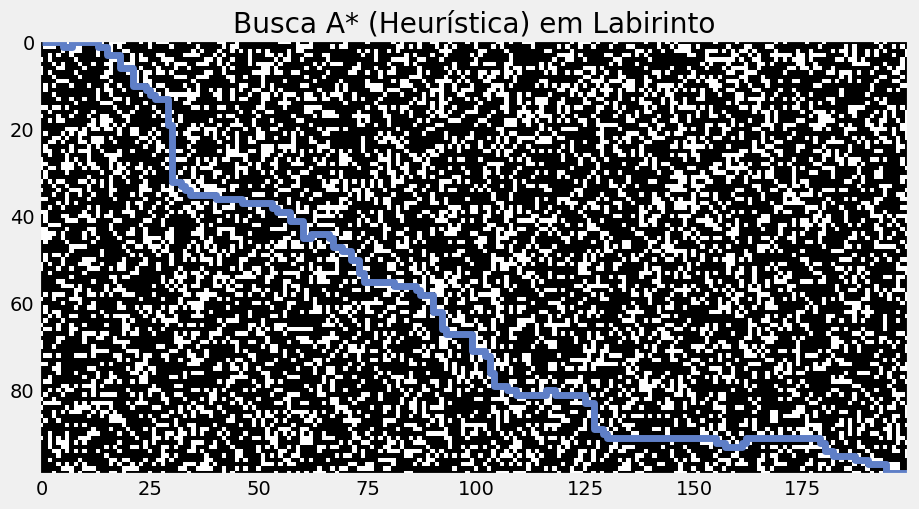

In [170]:
caminho = a_star(labirinto, inicio, fim, it=20, hr=False)